In [1]:
import numpy as np
import matplotlib.pyplot as plt
import spoof_data as spoof
import metrics as metric
import kalman_filter as kf

In [2]:
spoofer_ = spoof.SpoofData()

In [3]:
data, noisy_data, timestamps = spoofer_.run1()
filter_ = kf.KalmanFilter(0.0)
filter_.propagate(0)
#print(data[0], filter_.new_state_estimate)
filter_.measurementAndUpdate(data[0])


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]



In [4]:
data, noisy_data, timestamps = spoofer_.run1()
filter_ = kf.KalmanFilter(0)
estimates = []

for i in range(len(timestamps)):
  estimate = filter_.estimate(timestamps[i],  noisy_data[i])
  estimates.append(estimate)


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1.01012043 0.20221626 0.0302619 ]
 [0.20221626 1.04038233 0.20524548]
 [0.0302619  0.20524548 1.03066552]] [[1.03066552 0.3084152  0.06113429]
 [0.3084152  1.09179982 0.31453475]
 [0.06113429 0.31453475 1.06215048]]
[[1.04168654 0.4167701  0.12351758]
 [0.4167701  1.16520411 0.44149835]
 [0.12351758 0.44149835 1.13007459]] [[1.13007459 0.66773951 0.25719916]
 [0.66773951 1.38727375 0.71923083]
 [0.25719916 0.71923083 1.27406475]]
[[1.09831275 0.65720511 0.28753916]
 [0.65720511 1.38585191 0.74355321]
 [0.28753916 0.74355321 1.321602  ]] [[1.321602   1.14043069 0.63001084]
 [1.14043069 1.95161284 1.32962313]
 [0.63001084 1.32962313 1.72088823]]
[[1.18602314 0.93947692 0.53648742]
 [0.93947692 1.72251055 1.1542867 ]
 [0.53648742 1.1542867  1.64819999]] [[1.64819999 1.81422664 1.26290449]
 [1.81422664 2.91110448 2.3198941 ]
 [1.26290449 2.3198941  2.57708652]]
[[1.31325138 1.28315922 0.89272258]
 [1.28315922 2.205

In [5]:
est_accs = []
real_accs = []
for i in range(len(estimates)):
  est_accs.append(estimates[i][0])
  real_accs.append(data[i][0])


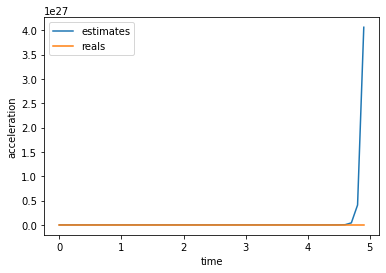

In [6]:
plt.plot(timestamps[0:50], est_accs[0:50], label="estimates")
plt.plot(timestamps[0:50], real_accs[0:50], label="reals")
plt.xlabel("time")
plt.ylabel("acceleration")
plt.legend()
plt.show()

In [7]:
x = np.array([[1.0020009999999997, 0.0, 0.0],[0.0, 1.0020009999999997, 0.0],[0.0, 0.0, 1.0020009999999997]]) 
y = np.array([[1.0030030009999995, 0.0, 0.0], [0.0, 1.0030030009999995, 0.0], [0.0, 0.0, 1.0030030009999995]])
x@np.linalg.inv(y)

array([[0.999001, 0.      , 0.      ],
       [0.      , 0.999001, 0.      ],
       [0.      , 0.      , 0.999001]])